# WALMART PROJECT

<hr style = "height: 1px">

**PROBLEM STATEMENT**

A retail store that has multiple across the country are facing issues in managing the inventory - to match the demand with respect to supply.

<hr style = "height: 1px">

In [1]:
# Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from PIL import Image
warnings.filterwarnings('ignore')

<hr style = "height: 1px">

# Exploratory Data Analysis

EDA involves a number of different steps to help us understand the characteristics of the dataset. Following this, the data is cleaned which ensures the data is well structured and free from issues such as outliers and missing values. EDA is also used to create visualizations are such as boxplots and correlation heatmaps which help in the subsequent model building steps.<br>

These steps are carried out below:

<hr style = "height: 1px">

**LOADING AND ANALYSING THE DATASET**

<hr style = "height: 1px">

In [2]:
# Load and the read the dataset
df = pd.read_csv("walmart.csv")

In [3]:
# Print the head of the dataset
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
# Print the information summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Identify the datatype of the columns
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

<hr style = "height: 1px">

**DATA CLEANING**

<hr style = "height: 1px">


In [6]:
# Find the shape of the dataset
df.shape

(6435, 8)

In [7]:
# To find null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# To find nan values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
# Find the number of duplicated values
duplicated_values = df.duplicated().sum()
duplicated_values

0

In [10]:
# Create DataFrame where holiday flags are equal to 1
df1 = df[df['Holiday_Flag'] == 1]
df1.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1       1  12-02-2010    1641957.44             1        38.51       2.548   
31      1  10-09-2010    1507460.69             1        78.69       2.565   
42      1  26-11-2010    1955624.11             1        64.52       2.735   
47      1  31-12-2010    1367320.01             1        48.43       2.943   
53      1  11-02-2011    1649614.93             1        36.39       3.022   

           CPI  Unemployment  
1   211.242170         8.106  
31  211.495190         7.787  
42  211.748433         7.838  
47  211.404932         7.838  
53  212.936705         7.742

In [11]:
# Count of each date in new DataFrame
df1['Date'].value_counts()

12-02-2010    45
10-09-2010    45
26-11-2010    45
31-12-2010    45
11-02-2011    45
09-09-2011    45
25-11-2011    45
30-12-2011    45
10-02-2012    45
07-09-2012    45
Name: Date, dtype: int64

In [12]:
# Maximum number of weekly sales
df['Weekly_Sales'].max()

3818686.45

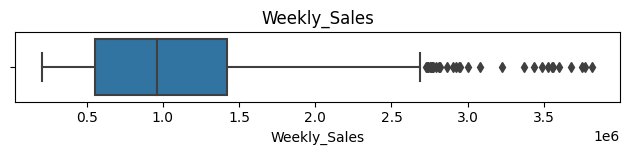

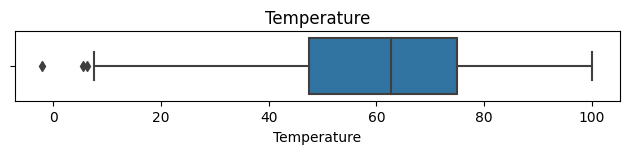

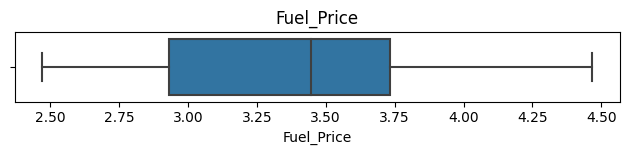

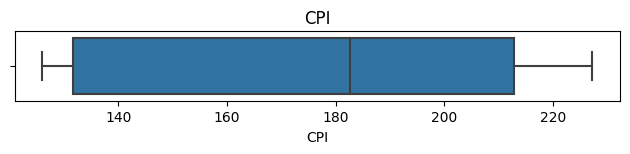

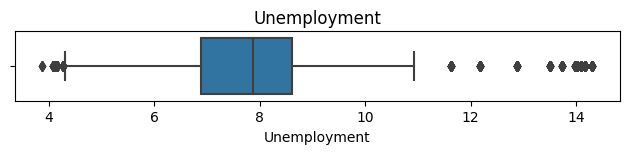

In [13]:
# Find outliers using boxplot
# Exclude object datatype. Exclude 'Store' and 'Holiday_Flag' columns.
for i, col in enumerate(df.columns):
    if (df[col].dtype!='object') & (col!='Store') & (col!='Holiday_Flag'):
        plt.subplot(5,1,5)
        sns.boxplot(x=df[col], whis=1.5)
        plt.tight_layout()
        plt.title(col)
        plt.show()

In [14]:
# Detection of outliers
outliers = pd.DataFrame()

for col in df.columns:
    if (df[col].dtypes!='object') & (col!='Store') & (col!='Holiday_Flag'):
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        UW=Q3+1.5*IQR
        LW=Q1-1.5*IQR
        outliers=df[(df[col]<=LW) | (df[col]>=UW)]

In [15]:
# Total number of outliers
outliers.shape

(481, 8)

In [16]:
# Percentage of outliers
(481/6431) *100

7.479396672368216

**Number of outliers present in the data is about 481 values. This represents 7% of the dataset and hence should be removed**

In [17]:
# Removing outliers
for col in df.columns:
    if (df[col].dtypes!='object') & (col!='Store') & (col!='Holiday_Flag'):
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        UW=Q3+1.5*IQR
        LW=Q1-1.5*IQR
        df=df[(df[col]>=LW) & (df[col]<=UW)]

In [18]:
# Updated dataset without outliers
df.shape

(5917, 8)

In [19]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5917 non-null   int64  
 1   Date          5917 non-null   object 
 2   Weekly_Sales  5917 non-null   float64
 3   Holiday_Flag  5917 non-null   int64  
 4   Temperature   5917 non-null   float64
 5   Fuel_Price    5917 non-null   float64
 6   CPI           5917 non-null   float64
 7   Unemployment  5917 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 416.0+ KB


In [20]:
# Converting date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5917 non-null   int64         
 1   Date          5917 non-null   datetime64[ns]
 2   Weekly_Sales  5917 non-null   float64       
 3   Holiday_Flag  5917 non-null   int64         
 4   Temperature   5917 non-null   float64       
 5   Fuel_Price    5917 non-null   float64       
 6   CPI           5917 non-null   float64       
 7   Unemployment  5917 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 416.0 KB


<hr style = "height: 1px">

**FEATURE ENGINEERING**

<hr style = "height: 1px">


In [21]:
# Creating a columns for year , month ,week
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.week
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype('int')
df['Day'] = df['Date'].dt.day.astype('int')

<hr style = "height: 1px">

# Data Visualisation

For Data Visualisation we will use the dataset 'df' which has been cleaned and pre-processed.

<br>

<hr style = "height: 1px">

**AVERAGE SALES PER MONTH**

<hr style = "height: 1px">

In [22]:
df2 = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

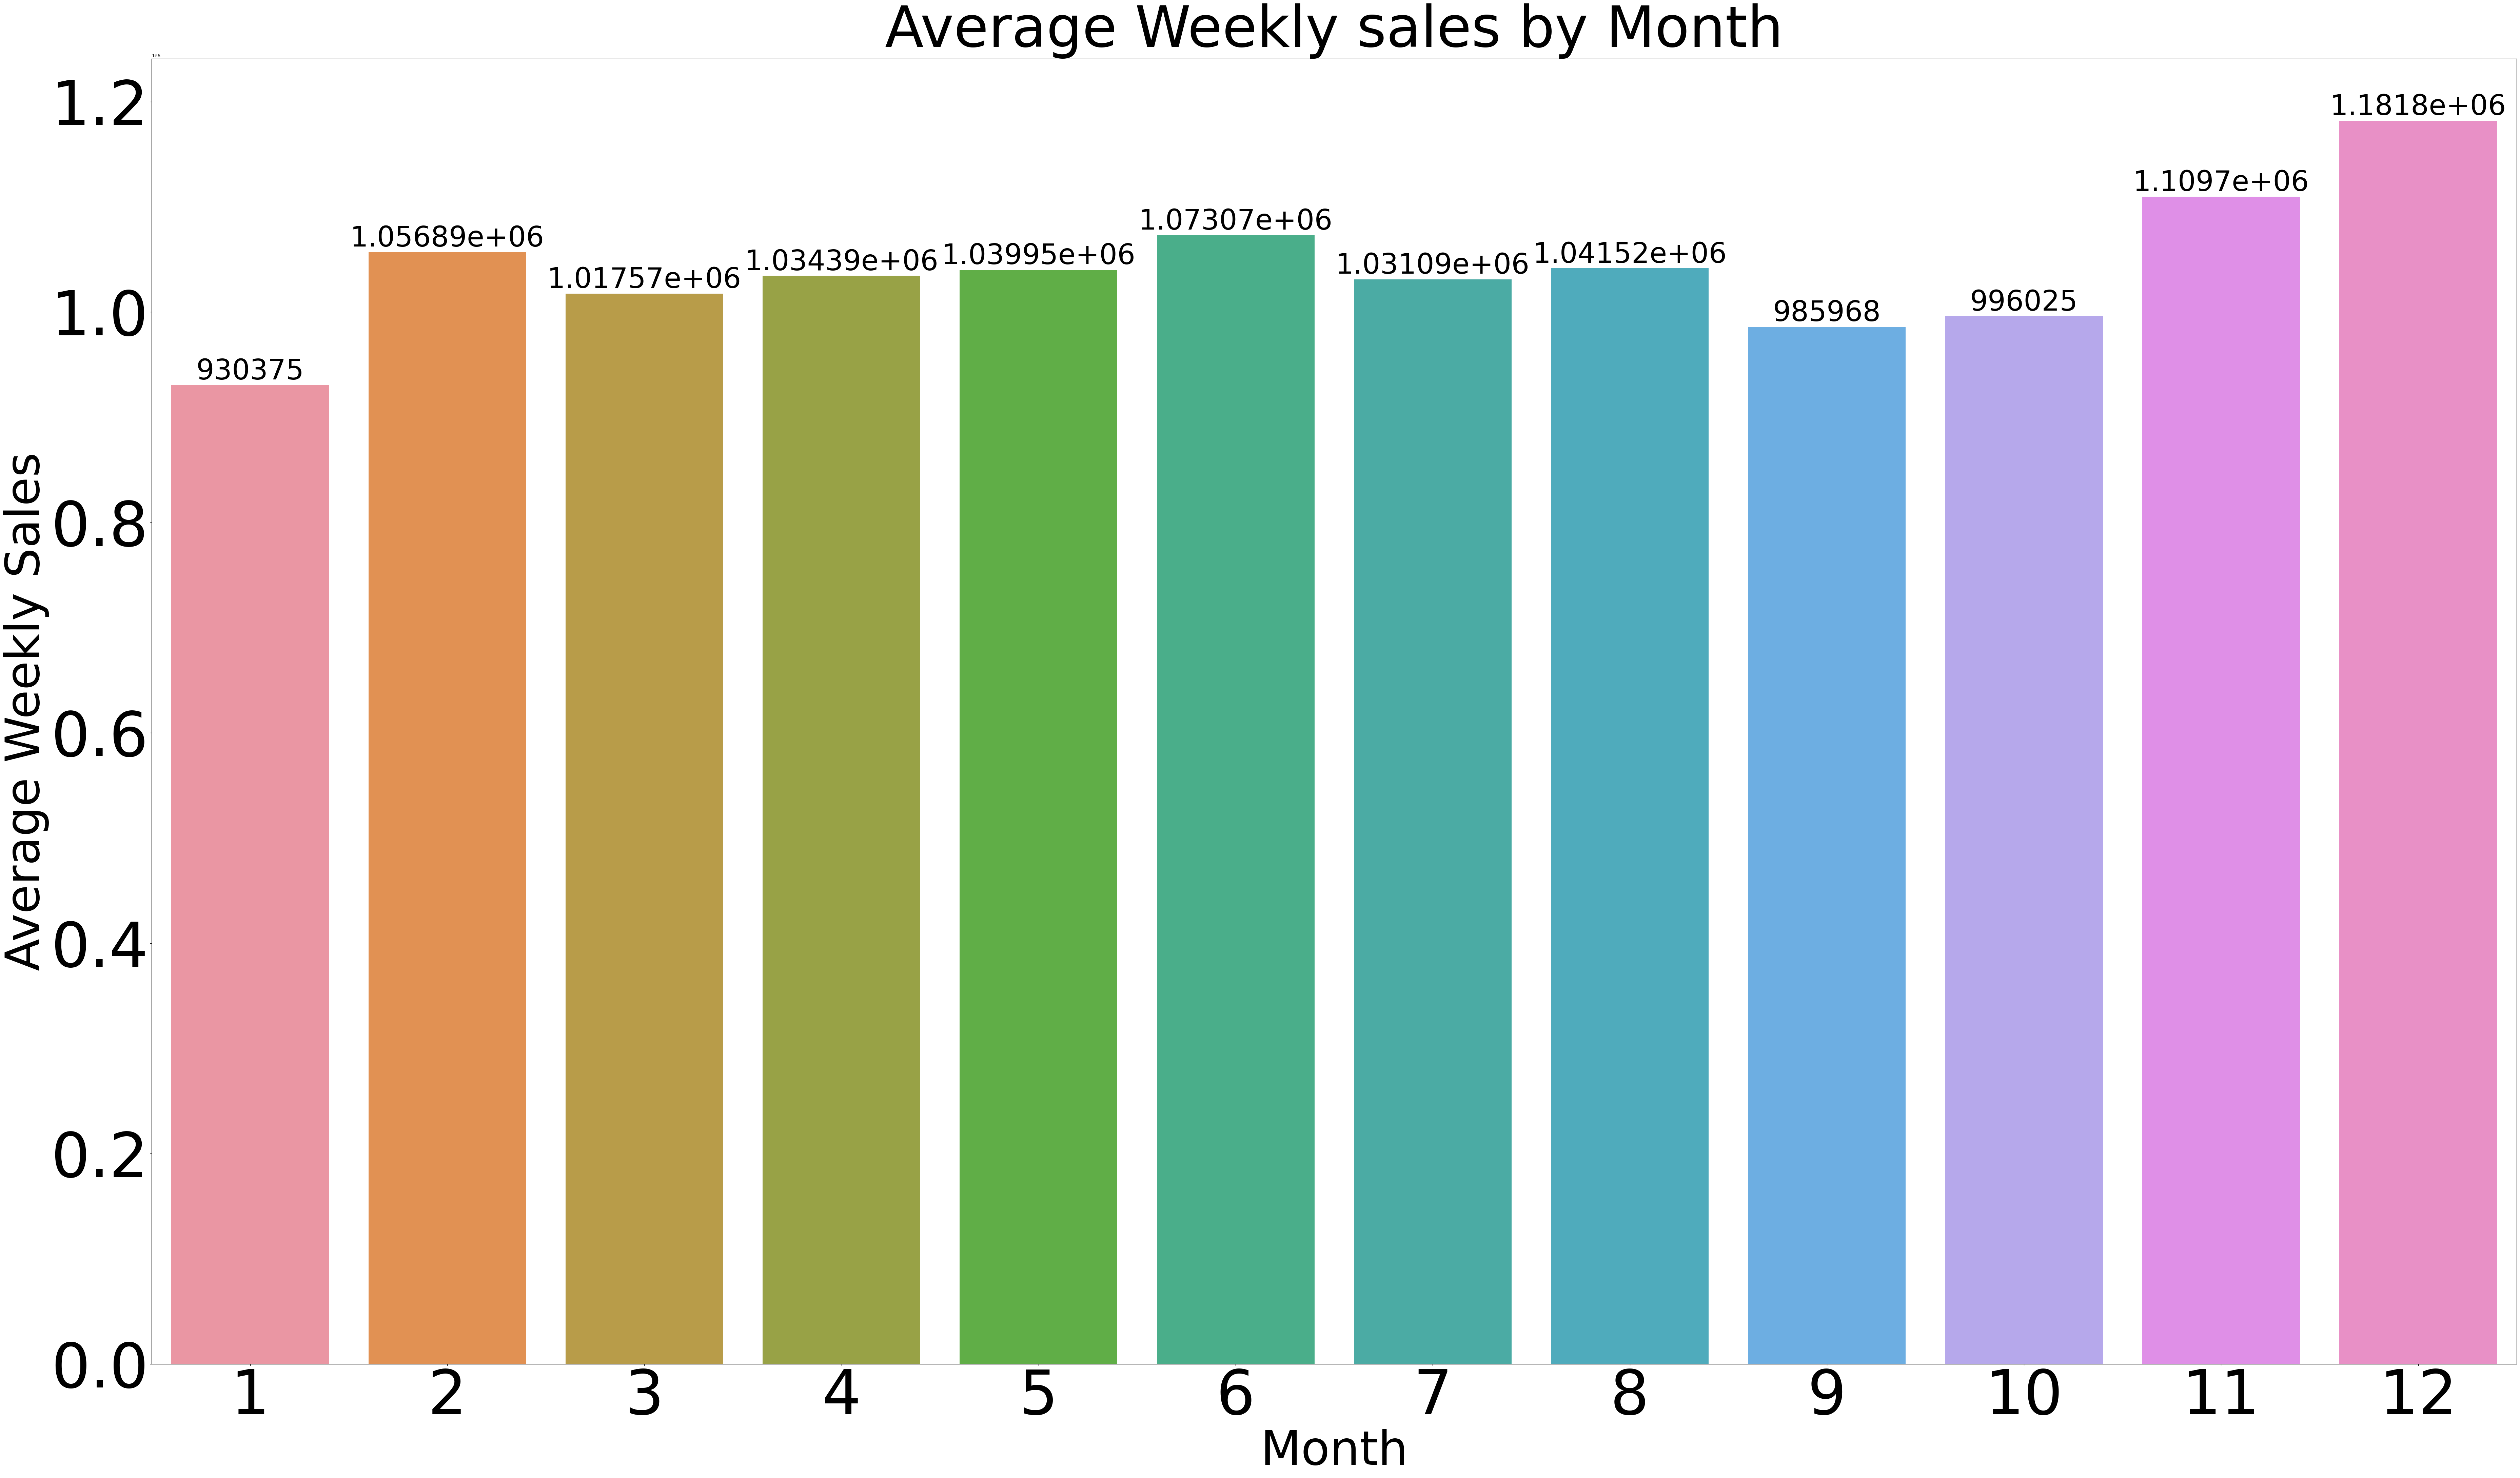

In [23]:
plt.figure(figsize=(90,50))

graph1 = sns.barplot(data=df2, x='Month', y='Weekly_Sales')
graph1.bar_label(graph1.containers[0], fontsize=60)

plt.xticks(rotation=0,fontsize=130)
plt.yticks(rotation=0,fontsize=130)
plt.xlabel('Month',fontsize=100)
plt.ylabel('Average Weekly Sales',fontsize=100)
plt.title('Average Weekly sales by Month',fontsize=120)
plt.show()

**This graph shows the average weekly sales by month remains relatively consistent throughout the year. The largest number of sales were recorded in December at 1,181,800. This may be due to the Christmas and New Year holidays. The lowest number of sales were recorded in January at 930,375.**

<hr style = "height: 1px">

**DISTRIBUTION OF WEEKLY SALES EVERY YEAR**

<hr style = "height: 1px">

Text(0.5, 1.0, 'Distribution of Weekly Sales Every Year')

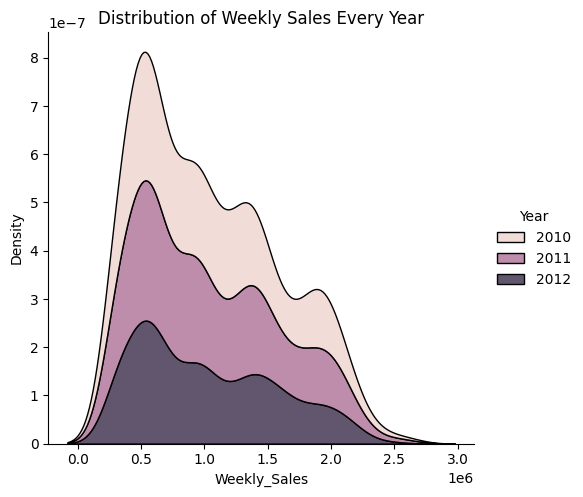

In [24]:
sns.displot(df, x="Weekly_Sales", hue="Year", kind="kde", multiple="stack")

plt.title('Distribution of Weekly Sales Every Year')

**This graph shows the distribution of the number of weekly sales. The highest concentration of sales for all 3 years can be seen around 600,000 a week. For 2012, the KDE plot shows the lowest density, suggesting a more dispersed distribution with a wider range of weekly sales values.** 

<hr style = "height: 1px">

**AVERAGE WEEKLY SALES OF STORES**

<hr style = "height: 1px">

In [25]:
df3 = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
df3.head()

Store  Weekly_Sales
0      1  1.555264e+06
1      2  1.905830e+06
2      3  4.027044e+05
3      4  2.038739e+06
4      5  3.180118e+05

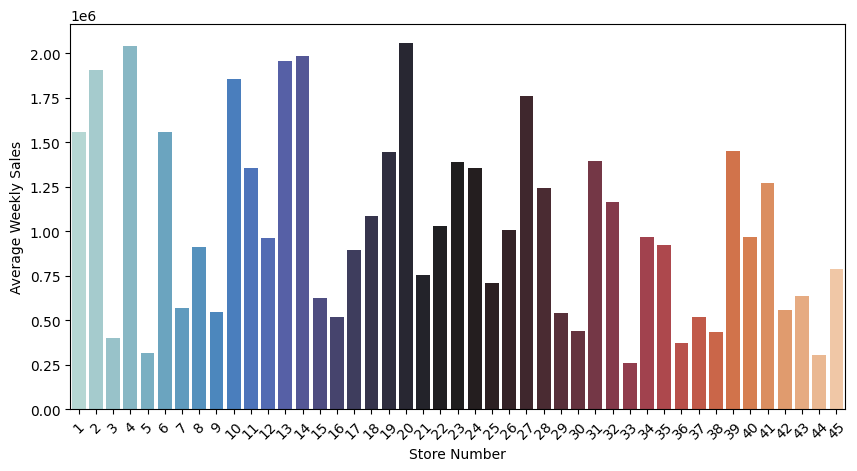

In [26]:
plt.figure(figsize=(10, 5))

graph2 = sns.barplot(data=df3, x='Store', y="Weekly_Sales", palette="icefire")

plt.xticks(rotation=45)
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales')
plt.show()

**This graph shows the number of average weekly sales vary greatly between each store. The stores with the highest number of sales are sotres 20, 4 and 14 with 2,058,998, 2,038,739 and 1,986,529 sales respectively. These top-performing stores demonstrate notable success in generating weekly sales revenue.**

<hr style = "height: 1px">

**TOTAL NUMBER OF SALES EACH YEAR**

<hr style = "height: 1px">

In [27]:
df4 = df.groupby('Year')['Weekly_Sales'].sum().reset_index()
df4.head()

Year  Weekly_Sales
0  2010  2.097829e+09
1  2011  2.260434e+09
2  2012  1.791352e+09

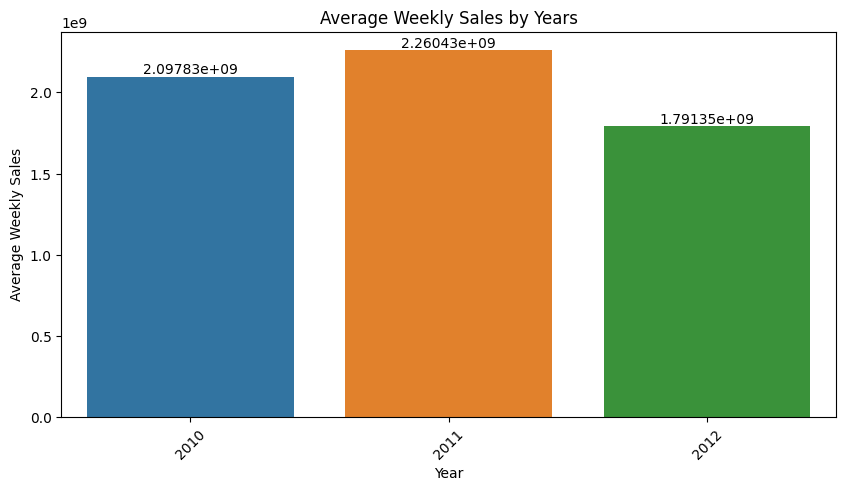

In [28]:
plt.figure(figsize=(10, 5))

graph3 = sns.barplot(data=df4, x='Year', y='Weekly_Sales')
graph3.bar_label(graph3.containers[0])

plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Years')
plt.show()

**The average weekly sales experienced a growth from 2,097,830,000 in 2010 to 2,260,430,000 in 2011. This represents a positive trend in sales performance, indicating an increase in revenue over two years. The revenue then decreases between 2011 and 2012 to 1,791,350,000.**

<hr style = "height: 1px">

**BEST PERFORMING STORES EACH YEAR**

<hr style = "height: 1px">

In [29]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  5917.000000  5.917000e+03   5917.000000  5917.000000  5917.000000   
mean     22.801251  1.039313e+06      0.069123    60.433407     3.340543   
std      13.094060  5.519450e+05      0.253684    18.386455     0.458200   
min       1.000000  2.099862e+05      0.000000     7.460000     2.472000   
25%      11.000000  5.525292e+05      0.000000    46.980000     2.891000   
50%      22.000000  9.472292e+05      0.000000    62.620000     3.420000   
75%      34.000000  1.427624e+06      0.000000    74.730000     3.721000   
max      45.000000  2.685352e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment         Year        Month         Week  \
count  5917.000000   5917.000000  5917.000000  5917.000000  5917.000000   
mean    175.023148      7.722305  2010.959101     6.444989    25.800913   
std      39.023139      1.243337     0.795111     3.220417    14.045441   
min     126.064000      4.308000  2010.000000     1.000000     1.000000   
25%     132.767067      6.891000  2010.000000     4.000000    14.000000   
50%     190.006988      7.852000  2011.000000     6.000000    26.000000   
75%     213.799099      8.494000  2012.000000     9.000000    37.000000   
max     227.232807     10.926000  2012.000000    12.000000    52.000000   

        WeekOfYear          Day  
count  5917.000000  5917.000000  
mean     25.800913    15.645935  
std      14.045441     8.761115  
min       1.000000     1.000000  
25%      14.000000     8.000000  
50%      26.000000    16.000000  
75%      37.000000    23.000000  
max      52.000000    31.000000

In [30]:
df4 = df[(df['Weekly_Sales'] >= 1427624)]
df4.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
4      1 2010-03-05    1554806.68             0        46.50       2.625   
5      1 2010-03-12    1439541.59             0        57.79       2.667   

          CPI  Unemployment  Year  Month  Week  WeekOfYear  Day  
0  211.096358         8.106  2010      2     5           5    5  
1  211.242170         8.106  2010      2     6           6   12  
2  211.289143         8.106  2010      2     7           7   19  
4  211.350143         8.106  2010      3     9           9    5  
5  211.380643         8.106  2010      3    10          10   12

In [31]:
plt.figure(figsize=(10, 5))

graph4 = px.bar(df4, x='Store', y='Weekly_Sales', color='Year',title='Best Performing Stores Each Year')
graph4.show()

<Figure size 1000x500 with 0 Axes>

**Store 20 has the highest number of sales over 1,427,624 at around 2.7 million. From the graph, stores 3, 5, 7, 9, 11, 12, 15, 16, 17, 25, 29, 30, 31, 33, 36, 37, 38, 42, 43 and 44 do not produce Sales above 1,427,624. Store 2 produces high weekly sales in 1.75 million in year 2010.** 

<hr style = "height: 1px">

**WEEKLY SALES OVER EACH YEAR**

<hr style = "height: 1px">

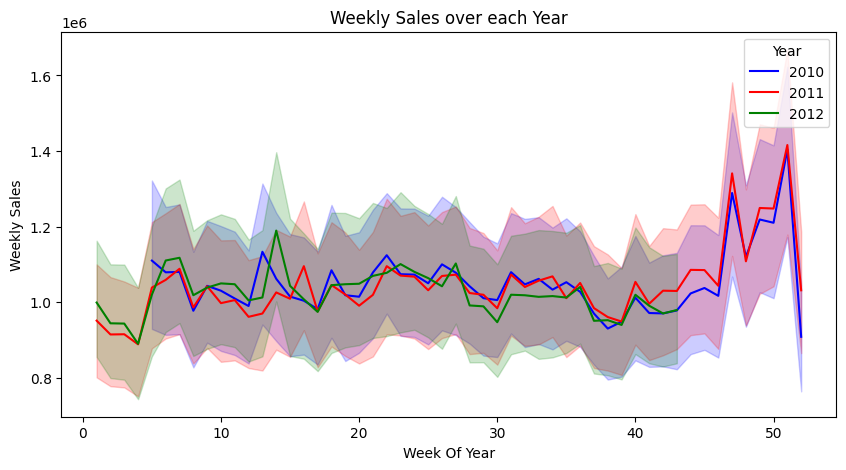

In [32]:
plt.figure(figsize=(10, 5))

sns.lineplot(df, x = 'WeekOfYear', y = 'Weekly_Sales', hue = 'Year', palette = ['blue', 'red', 'green'])

plt.xlabel('Week Of Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales over each Year')
plt.show()

**There is a notable increase in weekly sales between weeks 45 and 52 for all 3 years. This is due to the Christmas holiday period. This heightened activity suggests increased consumer spending, likely driven by holiday shopping and festive promotions.**

<hr style = "height: 1px">

**AVERAGE WEEKLY SALES PER DAY**

<hr style = "height: 1px">

In [33]:
df[df['Weekly_Sales'].max()==df['Weekly_Sales']]

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1953     14 2011-11-25    2685351.81             1        48.71       3.492   

           CPI  Unemployment  Year  Month  Week  WeekOfYear  Day  
1953  188.3504         8.523  2011     11    47          47   25

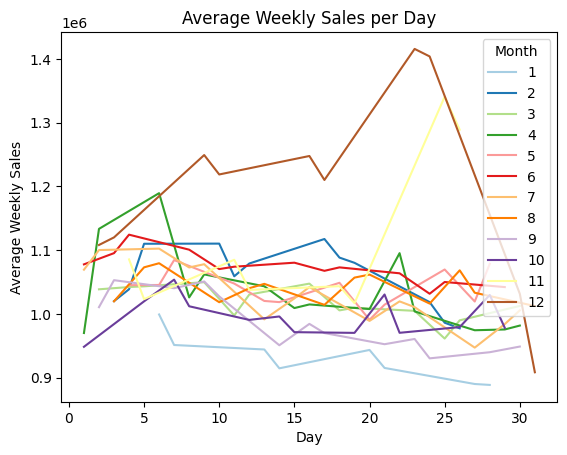

In [34]:
df5 = df.groupby(['Day', 'Month'])['Weekly_Sales'].mean().reset_index()

sns.lineplot(data=df5, x='Day', y='Weekly_Sales', hue = 'Month', palette = sns.color_palette("Paired", 12))

plt.xlabel('Day')
plt.ylabel('Average Weekly Sales') 
plt.title('Average Weekly Sales per Day')
plt.show()

**Initially, monthly sales showed a moderate trend, with a decline observed between the 10th and 20th day of each month. However, December stood out with exceptionally high sales, likely attributed to the Christmas holiday period. Store 14 recorded its peak sales of 2,685,351 million on 25th December. Store 33 has produced the lowest sales of 209,986.**

<hr style = "height: 1px">

**CPI IN EACH MONTH**

<hr style = "height: 1px">

Text(0.5, 1.0, 'CPI in each Month')

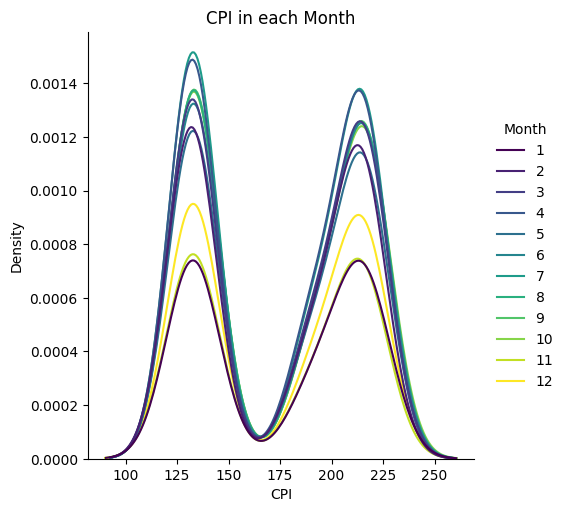

In [35]:
sns.displot(df, x="CPI", hue="Month", kind="kde",palette='viridis')
plt.title('CPI in each Month')

**Over the course of last 12 months, the Consumer Price Index has low values in initial month,however a notable increase was observed in 7th and 8th mionths ,indicating a average price during that period.Subsequently ,in the 12th month ,the CPI experienced a decline has generally maintained a moderate level during the year end**

<hr style = "height: 1px">

**UNEMPLOYMENT DURING THE HOLIDAYS**

<hr style = "height: 1px">

Text(0.5, 1.0, 'Unemployment during the holidays')

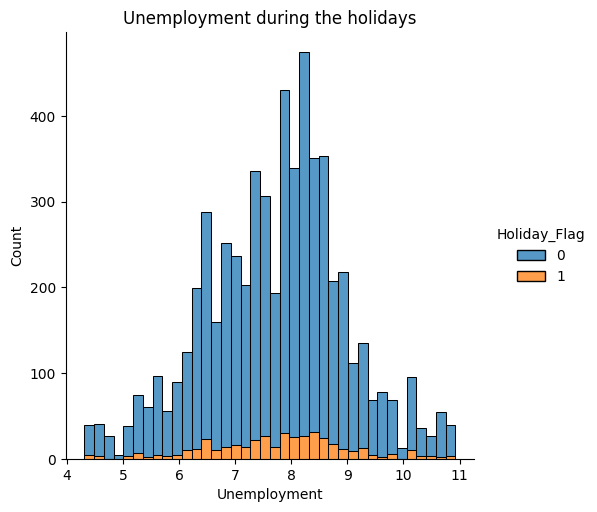

In [36]:
sns.displot(df, x="Unemployment", hue="Holiday_Flag", multiple="stack")
plt.title('Unemployment during the holidays')

**Unemployment rate exhibit a noteworthy tendency to be lower during holidays.While the correlation between holidays and lower unemployment is evident , it's essential to recognize the multifaceted nature of the job market dynamics during these festive periods.**

<hr style = "height: 1px">

**CPI AND UNEMPLOYMENT**

<hr style = "height: 1px">

In [37]:
df6 = df.groupby(['CPI','Holiday_Flag'])['Unemployment'].sum().reset_index()
df6.head()

CPI  Holiday_Flag  Unemployment
0  126.064000             0        67.533
1  126.076645             0        67.533
2  126.085452             0        67.533
3  126.089290             0        67.533
4  126.101935             0        67.533

Text(0.5, 1.0, 'CPI vs Unemployment')

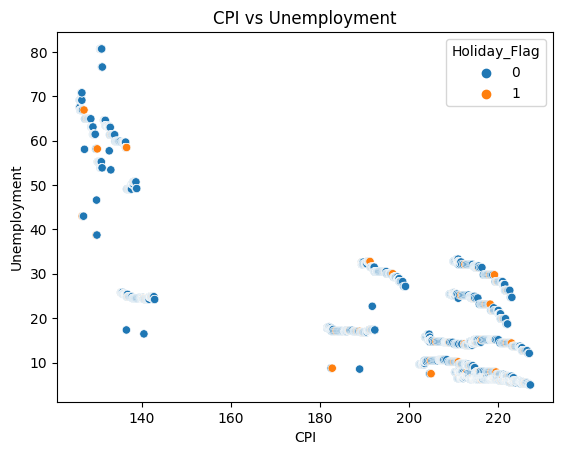

In [38]:
sns.scatterplot(df6,x='CPI',y='Unemployment',hue='Holiday_Flag')
plt.title('CPI vs Unemployment')

**Low CPI may indicate weak consumer demand, leading to lower production and reduced hiring by businesses. This results in higher unemployment rates. Conversely, high inflation might be leading to increase hiring and lower unemployment.** 

<hr style = "height: 1px">

**UNEMPLOYMENT DURING EACH MONTH**

<hr style = "height: 1px">

Text(0.5, 1.0, 'Unemployment during each month')

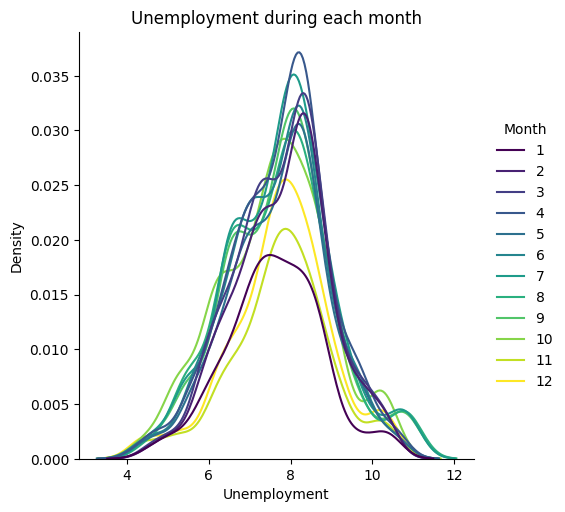

In [39]:
sns.displot(df, x="Unemployment", hue="Month", kind="kde",palette='viridis')
plt.title('Unemployment during each month')

**Unemployment trends show a similar pattern with all months indicating there is a weak correlation between unemployment and months. January has the lowest rate of unemployment while April has the highest.**

<hr style = "height: 1px">

# Project Insights

<br>

<hr style = "height: 1px">

**IF THE WEEKLY SALES ARE AFFECTED BY THE EMPLOYMENT RATE, WHICH STORES ARE SUFFERING THE MOST?**

<hr style = "height: 1px">

<AxesSubplot: >

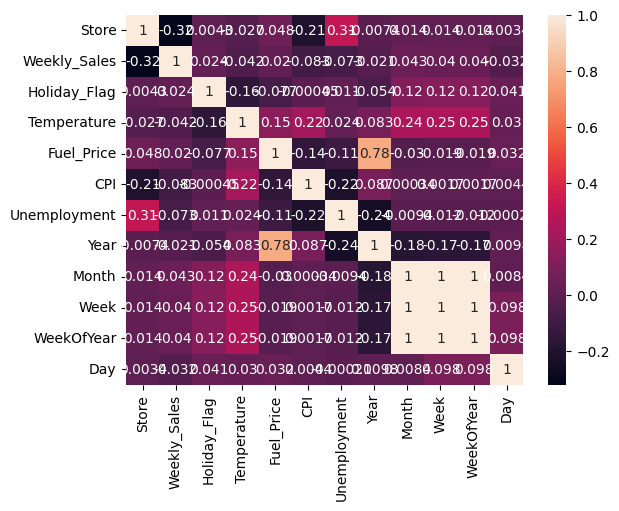

In [40]:
sns.heatmap(df.corr(), annot=True)

<hr>
The correlation between Weekly Sales and Unemployment Rate is -0.073. Since this is a low negative number, there is an overall very weak negative correlation between Weekly Sales and Unemployment Rate<br>
<br>

**However, we can investigate this further by looking at the individual correlations between Weekly Sales and Unemployment for each of the 45 stores. This has been done below:**
<hr>

In [41]:
# Find the correlation between Weekly Sales and Unemployment for each of the 45 stores
# Store these values in a Python array
overallCorr = []

for i in range(1,46):
    store = df[df['Store'] == i]
    storeCorr = store['Weekly_Sales'].corr(store['Unemployment'])
    overallCorr.append([i, storeCorr])

In [42]:
# Convert the Python array to a DataFrame with columns 'Store Number' and 'Correlation'
overallCorr = pd.DataFrame(overallCorr, columns=['Store Number', 'Correlation'])
overallCorr.head()

Store Number  Correlation
0             1    -0.097955
1             2     0.054288
2             3    -0.230413
3             4    -0.633422
4             5    -0.207043

Text(0.5, 1.0, 'Stores vs Correlation')

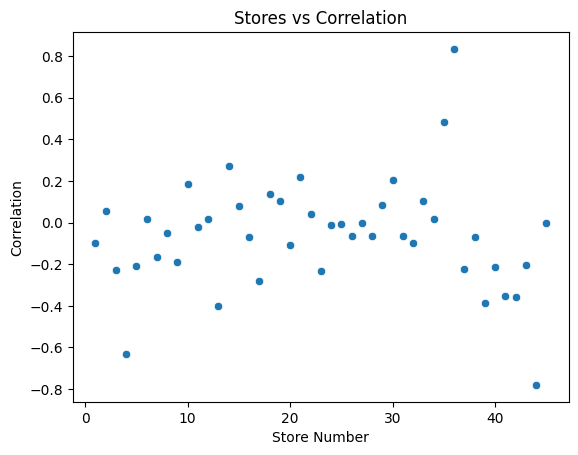

In [43]:
sns.scatterplot(x='Store Number', y='Correlation', data=overallCorr, palette='Set1')
plt.title('Stores vs Correlation')

<hr>
For the majority of stores there is a weak correlation between Weekly Sales and Unemployment but we can see a few stores have strong positive and strong negative correlations<br>
<br>

**As the unemployment rate increase we would expect to see the number of Weekly Sales decrease. We will therefore first visualise the Weekly Sales and Unemployment variables for the store with the strongest negative correlation**
<hr>

In [44]:
# Show the top 5 stores with the strongest negative correlations
overallCorr = overallCorr.sort_values(by=['Correlation'], ascending=True)
overallCorr.head(5)

Store Number  Correlation
43            44    -0.780076
3              4    -0.633422
12            13    -0.400254
38            39    -0.384681
41            42    -0.356355

<hr>
From this analysis we can see that store number 44 has a -0.78 correlation between Weekly Sales and Unemployment. From this we can infer that as Unemployment increases, Weekly Sales tends to decrease. There is a strong negative correlation between the two variables<br>
<br>

**This relationship can be visualised in the graph below:**
<hr>

In [45]:
# Create a new DataFrame only containing data from store 44
df7 = df.copy()
df7 = df7[df7['Store']==44]

Text(0.5, 1.0, 'High Negative Correlation of Store 44')

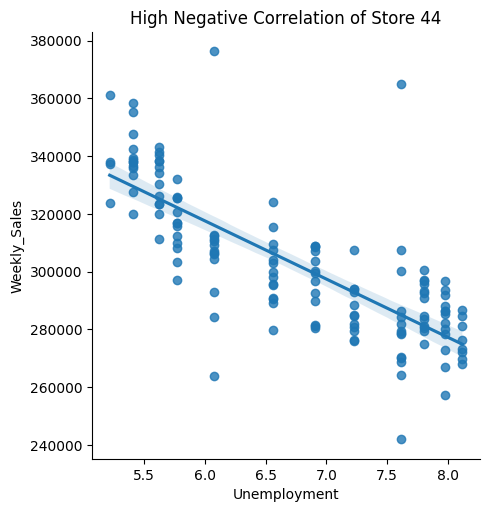

In [46]:
# Plot the Weekly Sales and Unemployment columns
# Use lmplot to provide a line of best fit which shows the negative correlation
sns.lmplot(x='Unemployment', y='Weekly_Sales', data=df7, palette='Set1')
plt.title('High Negative Correlation of Store 44')

<hr>
The 5 stores with the strongest positive correlations can be seen below:
<hr>

In [47]:
# Show the top 5 stores with the strongest positive correlations
overallCorr.tail(5)

Store Number  Correlation
29            30     0.201862
20            21     0.218367
13            14     0.269510
34            35     0.483865
35            36     0.833734

In [48]:
# Create a new DataFrame only containing data from store 36
df8 = df.copy()
df8 = df8[df['Store']==36]

Text(0.5, 1.0, 'High Positive Correlation of Store 36')

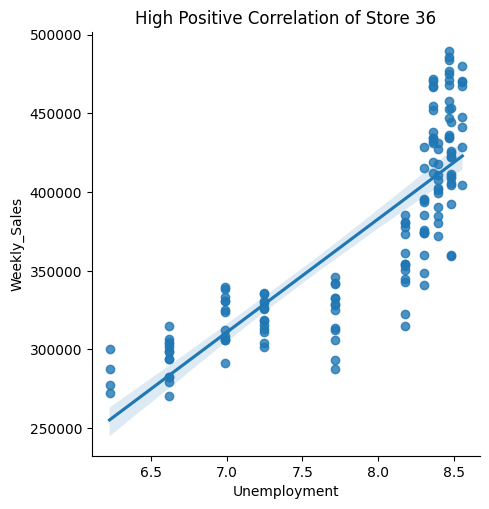

In [49]:
# Plot the Weekly Sales and Unemployment columns
# Use lmplot to provide a line of best fit which shows the positive correlation
sns.lmplot(x='Unemployment', y='Weekly_Sales', data=df8, palette='Set1')
plt.title('High Positive Correlation of Store 36')

<hr>

From the analysis carried out we can conclude that the relationship between Weekly Sales and Unemployment varies on a store to store basis. The majority of stores have no correlation between Weekly Sales and Unemployment as seen from the -0.073 value in the correlation heatmap <br>
<br>
**Store 44 has the strongest negative correlation (-0.78) between Weekly Sales and Unemployment while Store 35 has the strongest positive correlation (0.83)**
<hr>

<hr style = "height: 1px">

**IF THE WEEKLY SALES SHOW A SEASON TREND, WHEN AND WHAT COULD BE THE REASON?**

<hr style = "height: 1px">

In [50]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Week  WeekOfYear  Day  
0  211.096358         8.106  2010      2     5           5    5  
1  211.242170         8.106  2010      2     6           6   12  
2  211.289143         8.106  2010      2     7           7   19  
3  211.319643         8.106  2010      2     8           8   26  
4  211.350143         8.106  2010      3     9           9    5

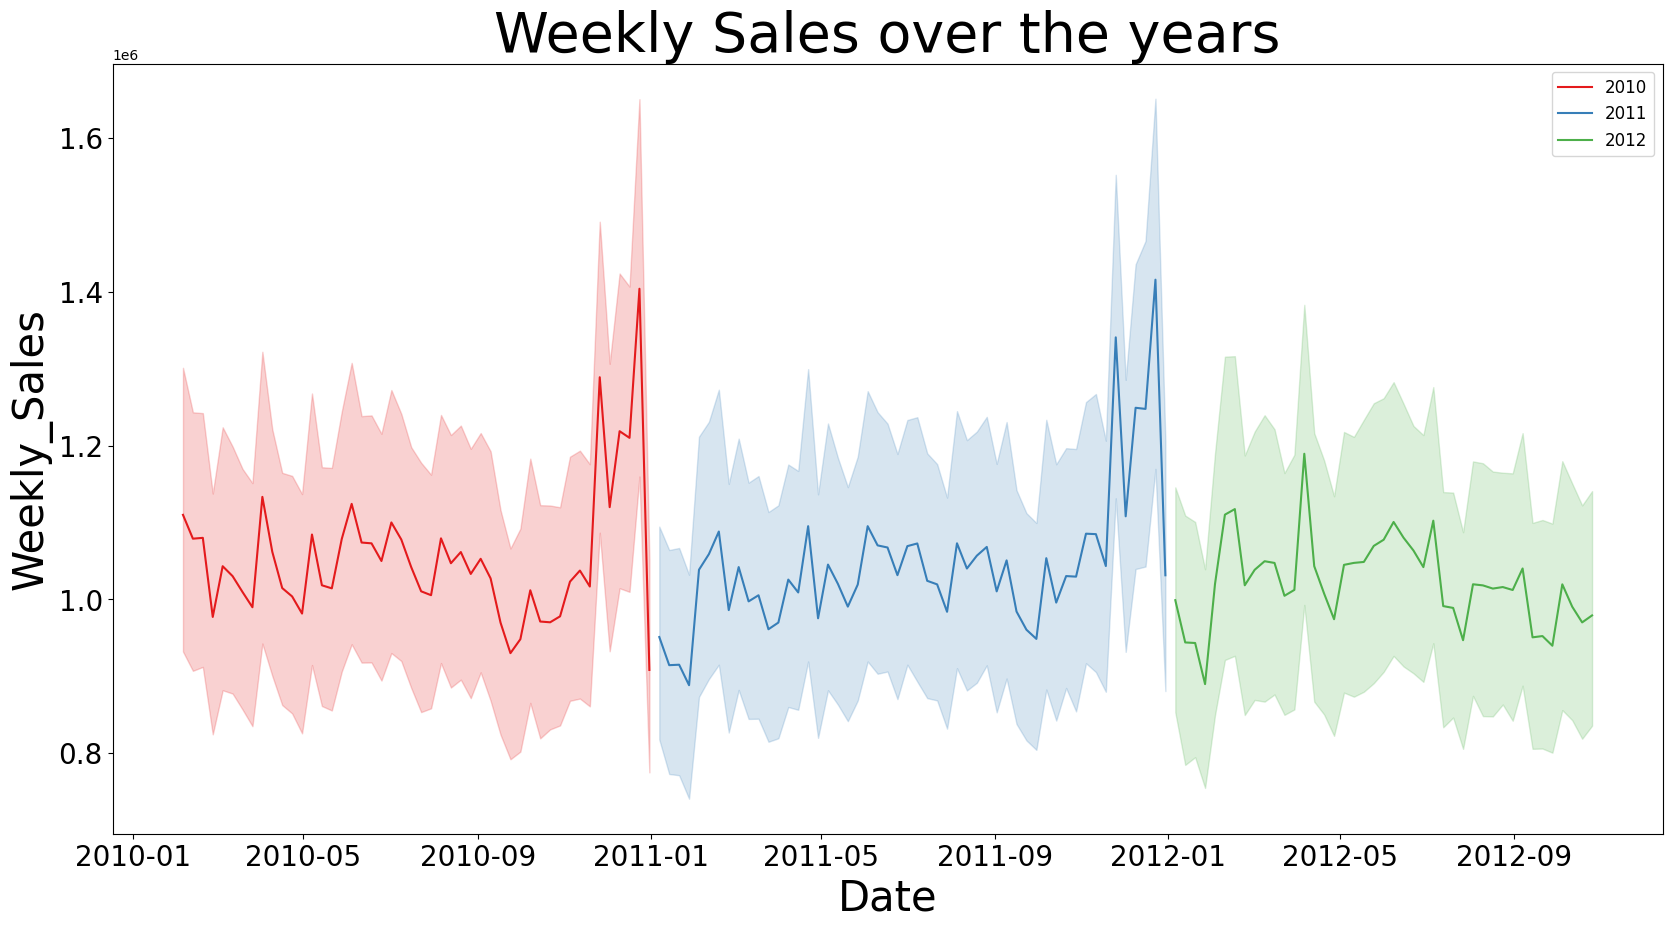

In [51]:
#To check pattern of Weekly_sales
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Weekly_Sales', hue='Year', data=df, palette='Set1')

plt.xlabel('Date',fontsize=30)
plt.ylabel('Weekly_Sales',fontsize=30)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)

plt.legend(fontsize='large')
plt.title('Weekly Sales over the years',fontsize=40 )
plt.show()

<hr>
From the above lineplot we can see in years 2010 and 2011 there are increases in Weekly Sales from November to December. This suggests there is a seasonal trend where Weekly Sales increase during the winter season.<br>
<br>
This peak is not present in 2012 because no data is provided after October 2012.<br>
<br>

**The reason for this happening is investigated below:**</br>
<hr>

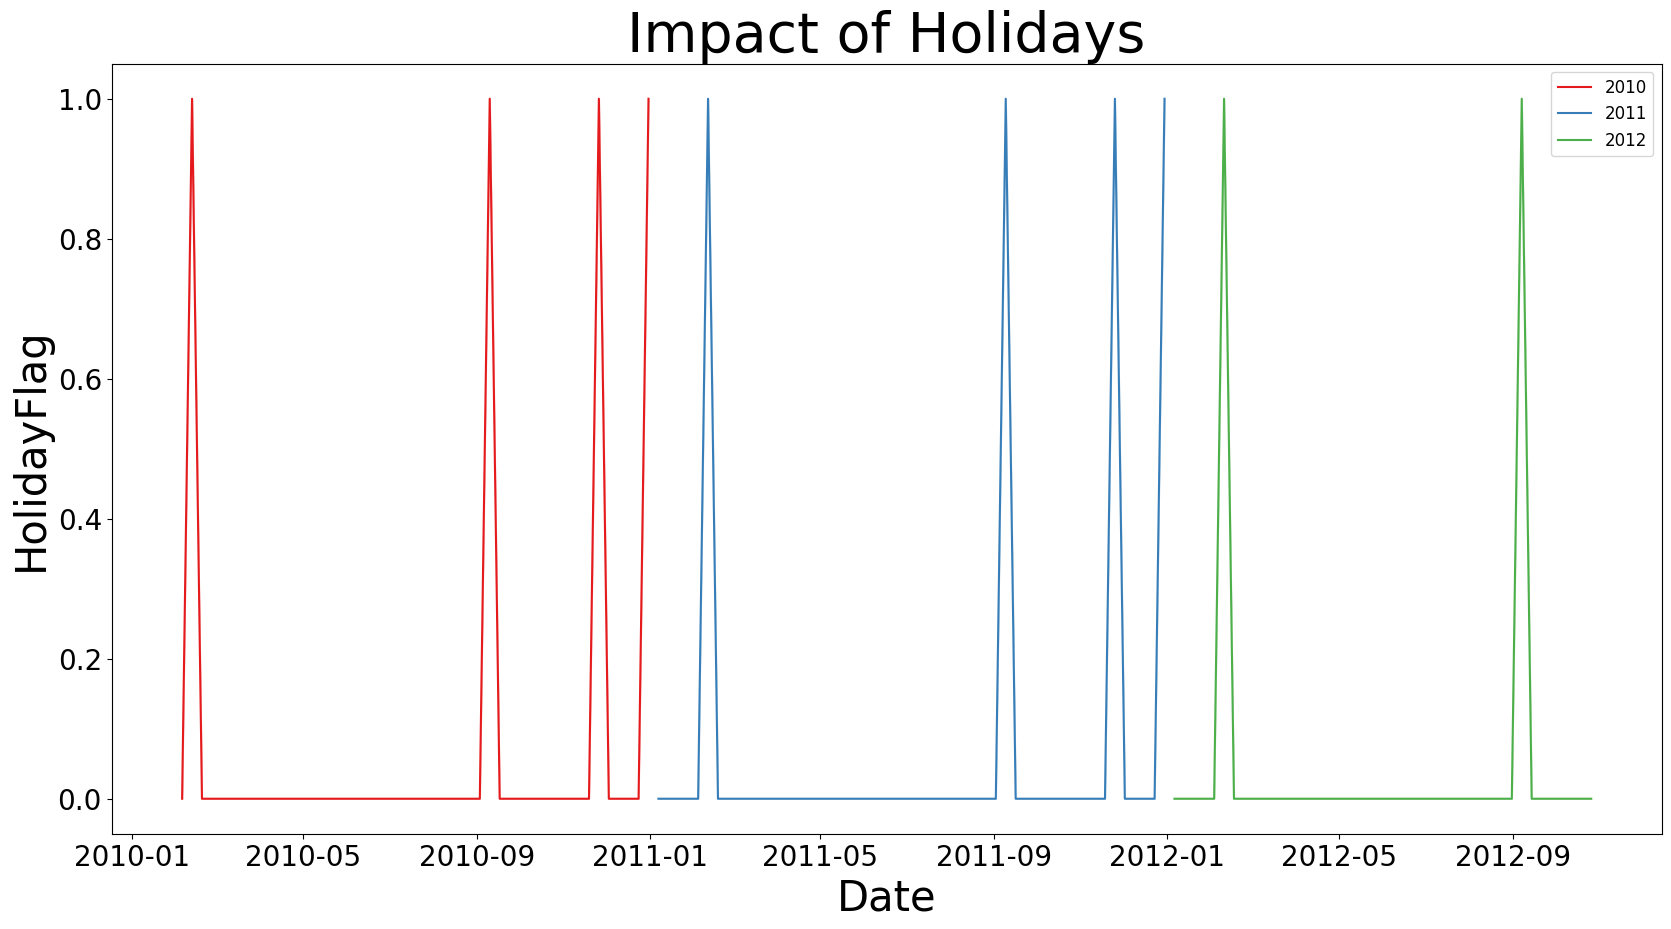

In [52]:
# Relationship between Date and Holiday Flag
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Holiday_Flag', hue='Year', data=df, palette='Set1')

plt.xlabel('Date',fontsize=30)
plt.ylabel('HolidayFlag',fontsize=30)
plt.xticks(rotation=0,fontsize=20)
plt.yticks(rotation=0,fontsize=20)

plt.legend(fontsize='large')
plt.title('Impact of Holidays',fontsize=40)
plt.show()

In [53]:
# Find the dates of holidays
df9 = df[df['Holiday_Flag']==True]
df9 = df9.sort_values(by='Date')
df9['Date'].value_counts()

2010-02-12    42
2010-09-10    42
2010-12-31    42
2011-02-11    42
2011-09-09    42
2011-12-30    42
2012-09-07    42
2012-02-10    40
2011-11-25    38
2010-11-26    37
Name: Date, dtype: int64

<hr />

**From the above analysis we can see the peak in Weekly Sales coincide with holiday dates throughout the year. We can therefore conclude the seasonal trend shown by Weekly Sales happens due to the holiday periods throughout the year.**

<hr />

<hr style = "height: 1px">

**DOES TEMPERATURE AFFECT THE WEEKLY SALES IN ANY MANNER?**

<hr style = "height: 1px">

<AxesSubplot: >

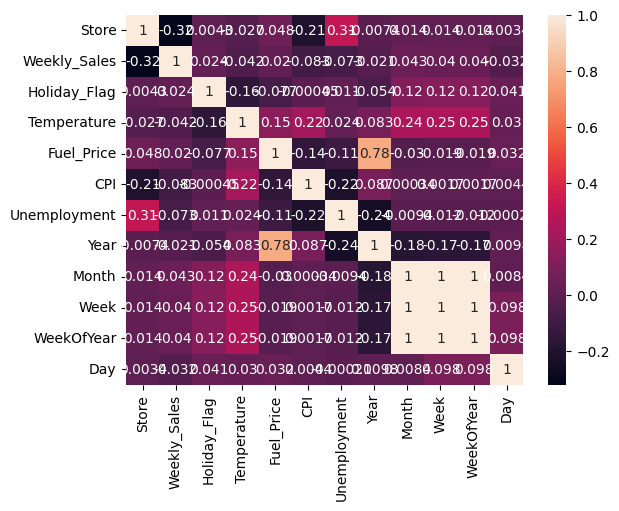

In [54]:
sns.heatmap(df.corr(), annot=True)

<hr />
The heatmap above shows a correlation of -0.042 between Temperature and Weekly Sales. This suggests a weak negative correlation: a change in Temperature does not tend to impact the change in Weekly Sales. <br />
<br />

**We can investigate this further by analysing the correlation for each individual store using the same method as previously for the correlation between Weekly Sales and Unemployment:**

<hr />

In [55]:
overallCorr2 = []

for i in range(1,46):
    store = df[df['Store'] == i]
    storeCorr = store['Weekly_Sales'].corr(store['Temperature'])
    overallCorr2.append([i, storeCorr])

In [56]:
# Convert the Python array to a DataFrame with columns 'Store Number' and 'Correlation'
overallCorr2 = pd.DataFrame(overallCorr2, columns=['Store Number', 'Correlation'])
overallCorr2.head()

Store Number  Correlation
0             1    -0.222701
1             2    -0.272249
2             3    -0.377524
3             4    -0.114243
4             5    -0.175517

Text(0.5, 1.0, 'Stores Vs Temperature Correlation')

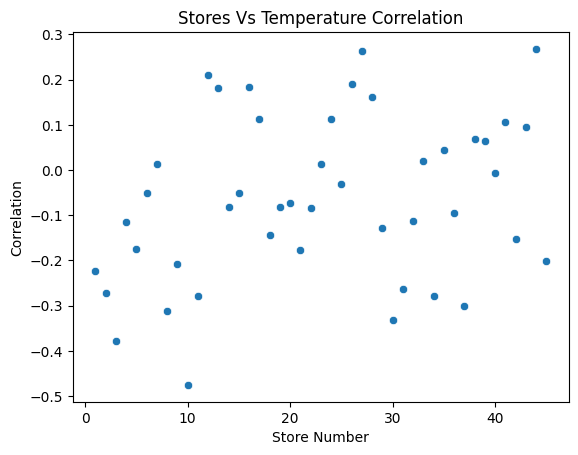

In [57]:
sns.scatterplot(x='Store Number', y='Correlation', data=overallCorr2, palette='Set1')
plt.title('Stores Vs Temperature Correlation')

<hr>
The above scatterplot shows all stores have weak correlations between Temperature and Weekly Sales.<br>
<hr>

In [58]:
# Strongest negative correlation
overallCorr2 = overallCorr2.sort_values(by=['Correlation'], ascending=True)
overallCorr2.head()

Store Number  Correlation
9             10    -0.475243
2              3    -0.377524
29            30    -0.330816
7              8    -0.312324
36            37    -0.300493

Text(0.5, 1.0, 'Store:10 Vs Temperature Correlation')

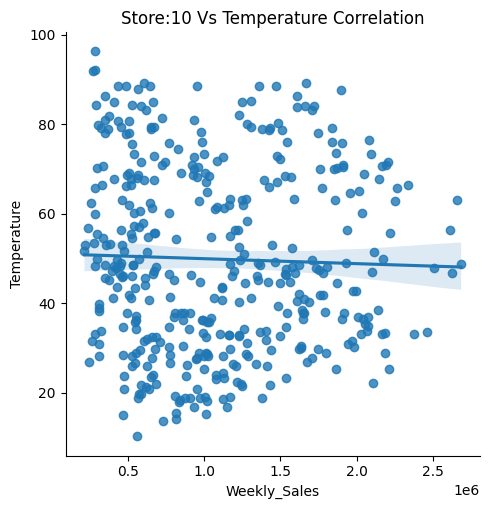

In [59]:
# Correlation of store 10
sns.lmplot(x='Weekly_Sales', y='Temperature', data=df9, palette='Set1')
plt.title('Store:10 Vs Temperature Correlation')

In [60]:
# Strongest positive correlation
overallCorr2.tail()

Store Number  Correlation
15            16     0.182948
25            26     0.190021
11            12     0.210494
26            27     0.262541
43            44     0.267822

In [61]:
# Create a new DataFrame only containing data from store 10
df10 = df.copy()
df10 = df10[df10['Store']==16]

Text(0.5, 1.0, 'Store:16 Vs Temperature Correlation')

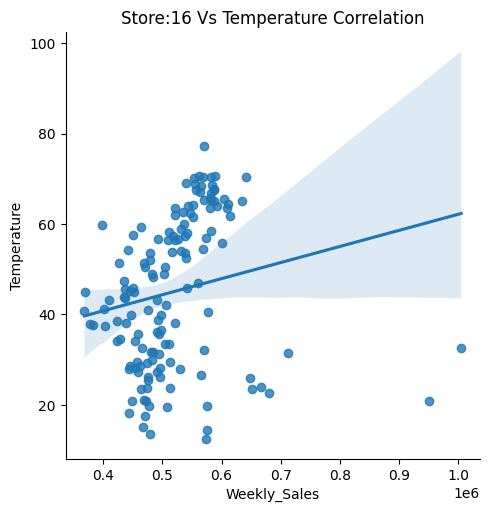

In [62]:
sns.lmplot(x='Weekly_Sales', y='Temperature', data=df10, palette='Set1')
plt.title('Store:16 Vs Temperature Correlation')

<hr>
The strongest negative correlation of -0.475 implies there is a weak negative correlation between Weekly Sales and Temperature for Store 44.<br>
<br>

**However, since the majority of the stores have very weak correlations, we can therefore conclude that Temperature does not tend to affect the Weekly Sales**
<hr>

<hr style = "height: 1px">

**HOW IS THE CONSUMER PRICE INDEX AFFECTING THE WEEKLY SALES OF VARIOUS STORES?**

<hr style = "height: 1px">

<hr>
This question is asking us to find the correlation between the CPI and Weekly Sales for different stores. We will therefore use the same method as before to find the correlation between these 2 variables for each store. We will then investigate any strong correlations further
<hr>

In [63]:
overallCorr3 = []

for i in range(1,46):
    store = df[df['Store'] == i]
    storeCorr = store['Weekly_Sales'].corr(store['CPI'])
    overallCorr3.append([i, storeCorr])

In [64]:
# Convert the Python array to a DataFrame with columns 'Store Number' and 'Correlation'
overallCorr3 = pd.DataFrame(overallCorr3, columns=['Store Number', 'Correlation'])
overallCorr3.head()

Store Number  Correlation
0             1     0.225408
1             2    -0.063786
2             3     0.317250
3             4     0.669028
4             5     0.308261

Text(0.5, 1.0, 'CPI vs WeeklySales')

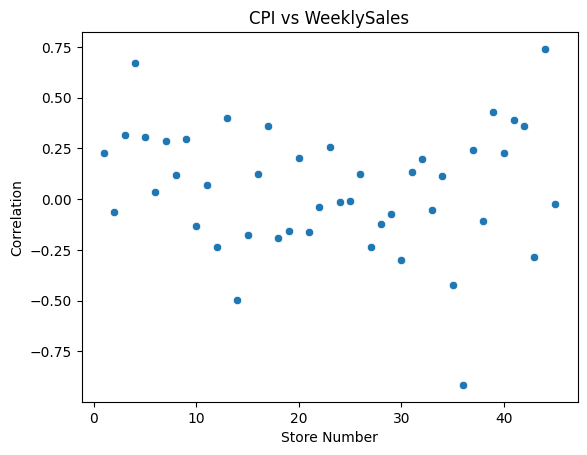

In [65]:
sns.scatterplot(x='Store Number', y='Correlation', data=overallCorr3, palette='Set1')
plt.title('CPI vs WeeklySales')

In [66]:
overallCorr3 = overallCorr3.sort_values(by=['Correlation'])
overallCorr3.head()

Store Number  Correlation
35            36    -0.915095
13            14    -0.498495
34            35    -0.424107
29            30    -0.298188
42            43    -0.285686

In [67]:
overallCorr3.tail()

Store Number  Correlation
40            41     0.392293
12            13     0.401445
38            39     0.428043
3              4     0.669028
43            44     0.740150

<hr>
The above analysis shows that CPI impacts Weekly Sales in different stores to different degrees.<br>
<br>
Some stores have a strong positive correlation which implies as CPI increases, Weekly Sales tend to increase. Other stores have a strong negative correlation which implies as CPI increases, Weekly Sales tend to decrease.<br>
<br>

**We can therefore conclude that CPI impacts Weekly Sales differently for different stores. Below are the visualisations for the Store 44 with the strongest positive correlation and Store 36 with the strongest negative correlations between CPI and Weekly Sales:**<br>
<hr>

In [68]:
# Store 44: Strongest positive correlation
# DataFrame only with store 44
df11 = df.copy()
df11 = df11[df11['Store']==44]

Text(0.5, 1.0, 'Positive correlation wi')

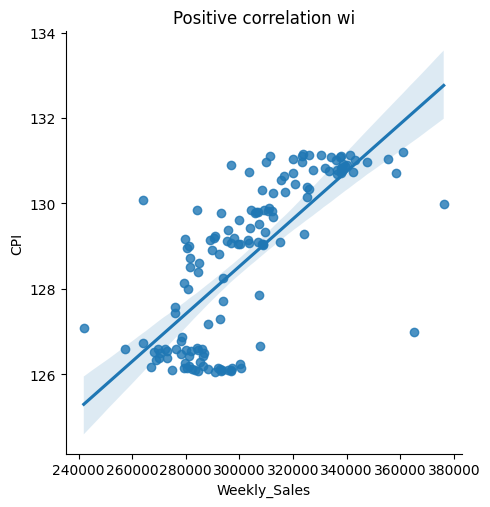

In [69]:
sns.lmplot(x='Weekly_Sales', y='CPI', data=df11, palette='Set1')
plt.title('Positive correlation wi')

In [70]:
# Store 36: Strongest negative correlation
# DataFrame only with store 36
df12 = df.copy()
df12 = df12[df12['Store']==36]

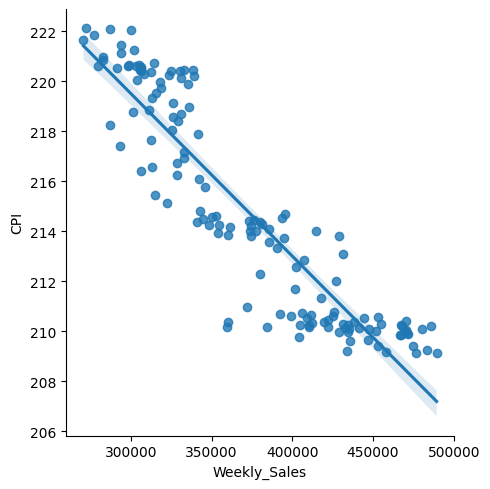

In [71]:
sns.lmplot(x='Weekly_Sales', y='CPI', data=df12, palette='Set1')

<hr>

The two visualisations above show the two stores with the strongest positive and negative correlations between CPI and Weekly Sales.<br>

**From this analysis we can therefore conclude that CPI tends to impact the Weekly Sales differently on a store to store basis. Store 44 has the strongest positive correlation (0.74) and store 36 has the strongest negative correlation (-0.91).**
<hr>

<hr style = "height: 1px">

**TOP PERFORMING STORES ACCORDING TO THE HISTORICAL DATA**

<hr style = "height: 1px">

<hr>
Based on the data provided, the most optimal way to judge performance of a store is to compare the total Weekly Sales figures for each store. The store with the highest number of Weekly Sales is the top performing store.
<hr>

In [72]:
# Total Weekly Sales summed for each store
totalWeeklySales = pd.DataFrame(df.groupby('Store')[['Weekly_Sales']].mean())
totalWeeklySales = totalWeeklySales.sort_values(by=['Weekly_Sales'], ascending=False)
totalWeeklySales = totalWeeklySales.reset_index()

In [73]:
# Highest 10 best performing stores
highestPerforming = totalWeeklySales.head(10)
highestPerforming

Store  Weekly_Sales
0     20  2.058998e+06
1      4  2.038739e+06
2     14  1.986529e+06
3     13  1.957682e+06
4      2  1.905830e+06
5     10  1.852745e+06
6     27  1.759140e+06
7      6  1.556539e+06
8      1  1.555264e+06
9     39  1.450668e+06

Text(0.5, 1.0, 'Top Performing Stores')

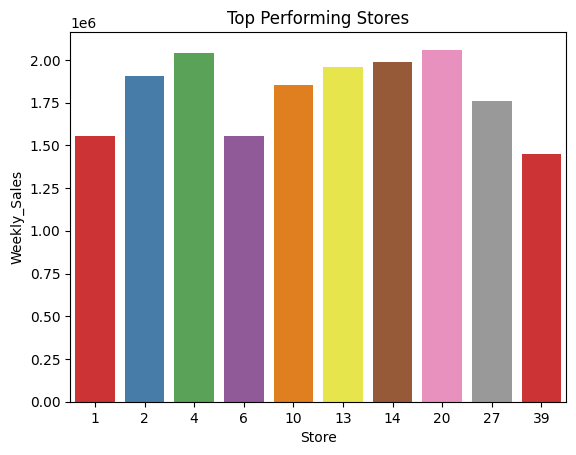

In [74]:
# Highest 10 performing stores visualised
sns.barplot(x='Store', y='Weekly_Sales', data=highestPerforming, palette='Set1')
plt.title('Top Performing Stores')

In [75]:
# Which is the highest performing store?
highestPerformingStore = highestPerforming.head(1)
highestPerformingStore

Store  Weekly_Sales
0     20  2.058998e+06

In [76]:
highestSalesStore = highestPerformingStore['Store'][0]
highestWeeklySales = highestPerformingStore['Weekly_Sales'][0]

print(f'Store: {highestSalesStore}')
print(f'Weekly Sales Total: {highestWeeklySales}')

Store: 20
Weekly Sales Total: 2058998.0500735294


<hr>

From this analysis, we have found the highest 10 performing stores and visualised this through a bar plot. <br>
<br>
**The highest performing store overall is store 20 with a total of around 280,023,735 Weekly Sales**
<hr>

<hr style = "height: 1px">

**WORST PERFORMING STORES ACCORDING TO THE HISTORICAL DATA**

<hr style = "height: 1px">

<hr>
To answer this question we can use the dataset total WeeklySales we previously created. Since it is sorted in descending order, we can find the worst 10 performing stores by accessing the tail of the DataFrame
<hr>

In [77]:
# Lowest 10 worst performing stores
lowestPerforming = totalWeeklySales.tail(10)
lowestPerforming

Store   Weekly_Sales
35     29  539451.428741
36     16  519247.730070
37     37  518900.281958
38     30  438579.616224
39     38  432198.758235
40      3  402704.441049
41     36  373511.992797
42      5  318011.810490
43     44  302748.866014
44     33  259861.692028

Text(0.5, 1.0, 'Least Performing Stores')

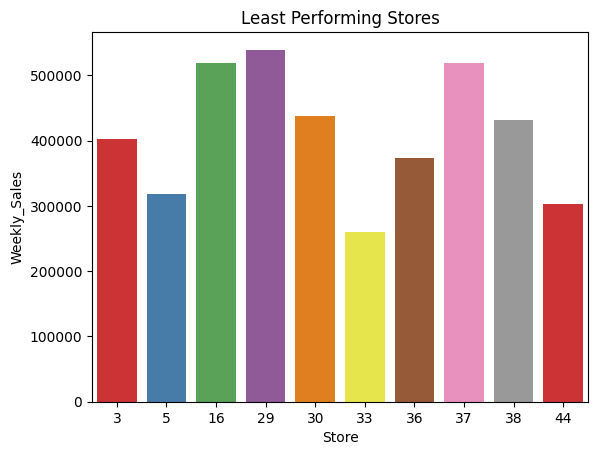

In [78]:
# Lowest 10 performing stores visualised
sns.barplot(x='Store', y='Weekly_Sales', data=lowestPerforming, palette='Set1')
plt.title('Least Performing Stores')

In [79]:
# Which is the worst performing store?
lowestPerformingStore = lowestPerforming.tail(1)
lowestPerformingStore

Store   Weekly_Sales
44     33  259861.692028

In [80]:
lowestSalesStore = 33
lowestWeeklySales = 259861.69

print(f'Store: {lowestSalesStore}')
print(f'Weekly Sales Total: {lowestWeeklySales}')

Store: 33
Weekly Sales Total: 259861.69


<hr>

From this analysis, we have found the lowest 10 performing stores and visualised this through a bar plot. We did this using the same methods to find the highest 10 performing stores. <br>
<br>
**The lowest performing store overall is store 38 with a total of around 7,347,379 Weekly Sales**
<hr>

<hr style = "height: 1px">

**DIFFERENCE BETWEEN HIGHEST AND LOWEST PERFORMING STORES**

<hr style = "height: 1px">

<hr>
The Weekly Sales for the highest and lowest performing stores have already been stored in the highestWeeklySales and lowestWeeklySales variables. These are compared below:
<hr>

In [81]:
highestWeeklySales

2058998.0500735294

In [82]:
lowestWeeklySales

259861.69

In [83]:
difference = highestWeeklySales - lowestWeeklySales
difference

1799136.3600735294

<hr>

**The difference in the number of Weekly Sales between the highest performing Store 20 and the lowest performing Store 38 is 1799136.360 Weekly Sales**<br>

<hr>

<hr style = "height: 1px">

# Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

<hr>
There are a few models we can use to perform sales forecast analysis. As we have been provided with Time Series data for Weekly Sales of each store, we can perform Time Series Analysis to derive insights from the given data and create future predictions. <br>
<br>

The two forecasting models we can use here are ARIMA and Exponential Smoothing. Exponential Smoothing is used when the given data doesn't have any clear trend or seasonality.
<br>

We will first perform linear regression to see if this model is suitable in answering the problem statement
<hr>

<hr style = "height: 1px">

**LABEL ENCODING**

Label encoding is required to change the categorical variables into numerical for training and testing the model.

<hr style = "height: 1px">

In [84]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le = LabelEncoder()
df13 = df.copy()

In [87]:
for i in df13.columns:
    if df13[i].dtype=='object':
        df13[i]=le.fit_transform(df1[i])

In [88]:
df13.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week',
       'WeekOfYear', 'Day'],
      dtype='object')

<hr style = "height: 1px">

**LINEAR REGRESSION**

<hr style = "height: 1px">

In [89]:
x = df13.drop('Weekly_Sales',axis=1)
y = df13['Weekly_Sales']

In [90]:
x = x.drop('Date', axis=1)
x

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0         1             0        42.31       2.572  211.096358         8.106   
1         1             1        38.51       2.548  211.242170         8.106   
2         1             0        39.93       2.514  211.289143         8.106   
3         1             0        46.63       2.561  211.319643         8.106   
4         1             0        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6430     45             0        64.88       3.997  192.013558         8.684   
6431     45             0        64.89       3.985  192.170412         8.667   
6432     45             0        54.47       4.000  192.327265         8.667   
6433     45             0        56.47       3.969  192.330854         8.667   
6434     45             0        58.85       3.882  192.308899         8.667   

      Year  Month  Week  WeekOfYear  Day  
0     2010      2     5           5    5  
1     2010      2     6           6   12  
2     2010      2     7           7   19  
3     2010      2     8           8   26  
4     2010      3     9           9    5  
...    ...    ...   ...         ...  ...  
6430  2012      9    39          39   28  
6431  2012     10    40          40    5  
6432  2012     10    41          41   12  
6433  2012     10    42          42   19  
6434  2012     10    43          43   26  

[5917 rows x 11 columns]

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [93]:
x_train

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
1325     10             0        68.76       3.130  126.436419         9.003   
3344     24             0        26.09       3.452  133.492143         8.252   
387       3             0        51.86       3.261  223.375526         6.833   
4826     34             0        39.89       3.541  130.550207         9.653   
784       6             0        84.01       3.699  216.819252         6.855   
...     ...           ...          ...         ...         ...           ...   
3174     23             0        68.65       2.796  132.661613         5.326   
2161     16             0        52.08       2.737  189.445243         6.842   
1091      8             0        56.86       3.372  221.127803         6.123   
5187     37             0        62.72       2.689  210.720244         8.476   
620       5             0        48.30       2.976  211.956030         6.634   

      Year  Month  Week  WeekOfYear  Day  
1325  2010     10    43          43   29  
3344  2011      2     8           8   25  
387   2012      1     2           2   13  
4826  2012      2     8           8   24  
784   2011      6    22          22    3  
...    ...    ...   ...         ...  ...  
3174  2010      8    33          33   20  
2161  2010      5    21          21   28  
1091  2011     10    43          43   28  
5187  2010     11    44          44    5  
620   2011      1     1           1    7  

[4733 rows x 11 columns]

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [96]:
y_pred = model.predict(x_test)
y_pred

array([1202522.72983139, 1073464.7612617 ,  977318.17539237, ...,
       1344585.55605079, 1140404.50840696,  737437.45490611])

In [97]:
r2 = r2_score(y_test, y_pred)
r2

0.15922725672480387

**The R2 score of 15% shows that Linear Regression is not an effective method in answering the problem statement. It can therefore be disregarded.**

<hr style = "height: 1px">

**ARIMA**

<hr style = "height: 1px">

In [98]:
salesCorr = []

for i in range(1,46):
    store = df[df['Store'] == i]
    storeCorr = store['Weekly_Sales'].corr(pd.to_numeric(store['Date']))
    salesCorr.append([i, storeCorr])

salesCorr = pd.DataFrame(salesCorr, columns=['Store Number', 'Correlation'])

salesCorr['Correlation'] = abs(salesCorr['Correlation'])
salesCorr = salesCorr.sort_values(by=['Correlation'], ascending=True)

In [99]:
# Weakest correlation
salesCorr.head(1)

Store Number  Correlation
5             6     0.003163

In [100]:
# Strongest correlation
salesCorr.tail(1)

Store Number  Correlation
35            36     0.942481

In [101]:
# Strongest performing
totalWeeklySales.head(1)

Store  Weekly_Sales
0     20  2.058998e+06

In [102]:
# Weakest performing
totalWeeklySales.tail(1)

Store   Weekly_Sales
44     33  259861.692028

<hr style = "height: 1px">

**We will produce prediction models for stores 1, 6, 36, 20 and 38**

<hr style = "height: 1px">

In order to produce a model with high accuracy, we need to first determine if the data we are working with is stationary nor not. If the data is non stationary we need to further process the data with either log transformation or square root transformation.

<br>

In [103]:
#ADF Test - if the p-value < 0.05 - Data is stationary
from statsmodels.tsa.stattools import adfuller

def adf(store, i):
    result = adfuller(store)
    
    print(f'ADF Statistic: {result[0]}') #some default value based upon the critial values
    print(f'p-value: {result[1]}')
    print(f'n_lags: {result[2]}') #previous no.of observations used for prediction

    if(result[1]>0.05):
        print(f'Store {i}: The series is not stationary')
    else:
        print(f'Store {i}: The series is stationary')
    print('--------------')

In [104]:
storeModels = [6, 36, 20, 38]

for i in storeModels:
    store = df[df['Store'] == i]
    store = pd.DataFrame(store.groupby(store.index)['Weekly_Sales'].sum())
    adf(store, i)

ADF Statistic: -5.294329877929837
p-value: 5.625696763153646e-06
n_lags: 4
Store 6: The series is stationary
--------------
ADF Statistic: 0.21363188452557658
p-value: 0.9730158839006191
n_lags: 8
Store 36: The series is not stationary
--------------
ADF Statistic: -1.8334316831502826
p-value: 0.36399460154866586
n_lags: 12
Store 20: The series is not stationary
--------------
ADF Statistic: -4.523395189776184
p-value: 0.00017836040761491051
n_lags: 5
Store 38: The series is stationary
--------------


In [105]:
data = df.copy()
data.set_index('Date',inplace=True)
data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  Year  Month  Week  WeekOfYear  Day  
Date                                                                      
2010-02-05  211.096358         8.106  2010      2     5           5    5  
2010-02-12  211.242170         8.106  2010      2     6           6   12  
2010-02-19  211.289143         8.106  2010      2     7           7   19  
2010-02-26  211.319643         8.106  2010      2     8           8   26  
2010-03-05  211.350143         8.106  2010      3     9           9    5

<hr style = "height: 1px">

**STORES (Example input is for store 1)**

<hr style = "height: 1px">

Repeat the below for stores 6, 36, 20 and 38

In [106]:
storeNumber = int(input("Enter the store id:"))
store = data[data.Store==storeNumber]
store = pd.DataFrame(store.groupby(store.index)['Weekly_Sales'].sum())
store

Enter the store id:1


Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

[143 rows x 1 columns]

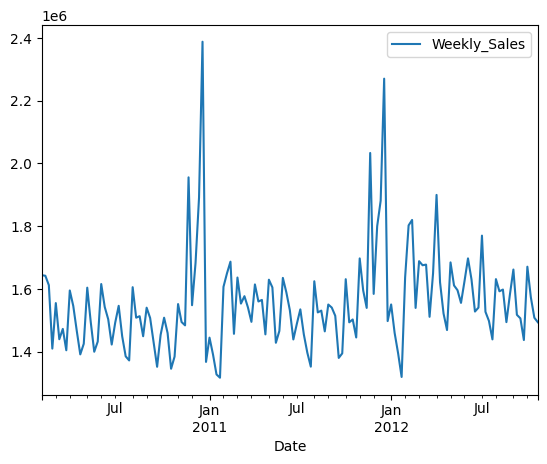

In [107]:
store.plot()
plt.show()

In [108]:
mean_log=store.rolling(window=12).mean()
std_log=store.rolling(window=12).std()

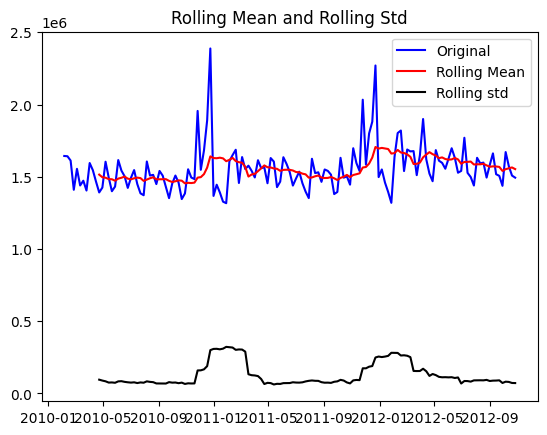

In [109]:
plt.plot(store,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

<hr style = "height: 1px">

**LOG TRANSFORMATION**

This is only required for stores where the data is not stationary

<hr style = "height: 1px">

In [111]:
first_log = np.log(store)
first_log = first_log.dropna()

In [112]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

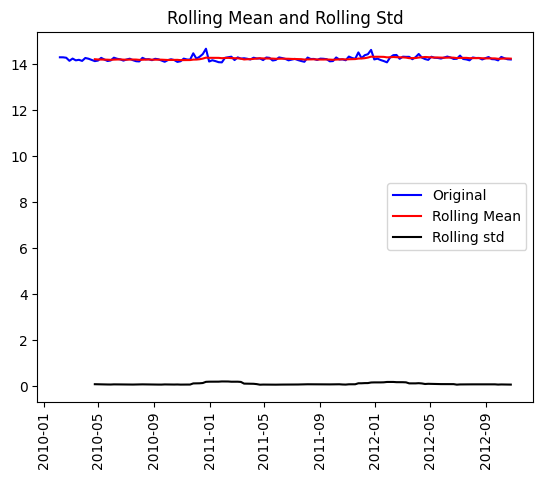

In [113]:
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')

plt.legend(loc='best')
plt.xticks(rotation=90)

plt.title('Rolling Mean and Rolling Std')
plt.show()

In [114]:
store = first_log-mean_log
store = store.dropna()
store.head()

Weekly_Sales
Date                    
2010-04-23     -0.083201
2010-04-30     -0.047274
2010-05-07      0.072908
2010-05-14      0.008380
2010-05-21     -0.056418

In [115]:
mean_log_second = store.rolling(window=12).mean()
std_log_second = store.rolling(window=12).std()

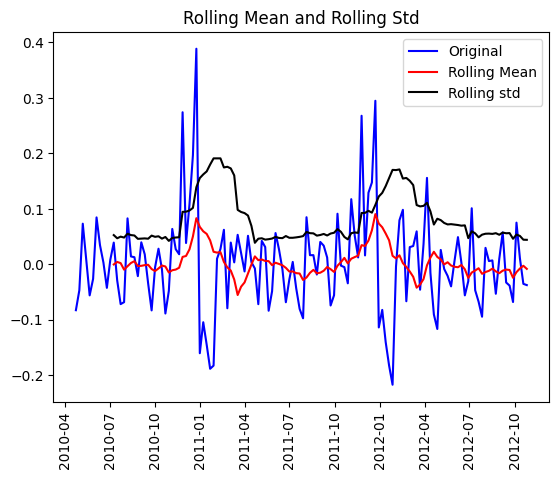

In [116]:
plt.plot(store,color='blue',label='Original')
plt.plot(mean_log_second,color='red',label='Rolling Mean')
plt.plot(std_log_second,color='black',label='Rolling std')

plt.legend(loc='best')
plt.xticks(rotation=90)

plt.title('Rolling Mean and Rolling Std')
plt.show()

<hr style = "height: 1px">

**SEASONAL DECOMPOSITION**

<hr style = "height: 1px">

Perform seasonal decomposition to identify any seasonality in the data <br>

If you have Time Series data you can break it down into several components. Seasonal decomposition will break down the Seasonal, Trend and Residual parts of the data separately<br>

The Seasonal decompose removes the noise in the data and plots the noise in the residuals graph. We can see the Seasonal graph has a similar pattern to our original data <br>
<hr>

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

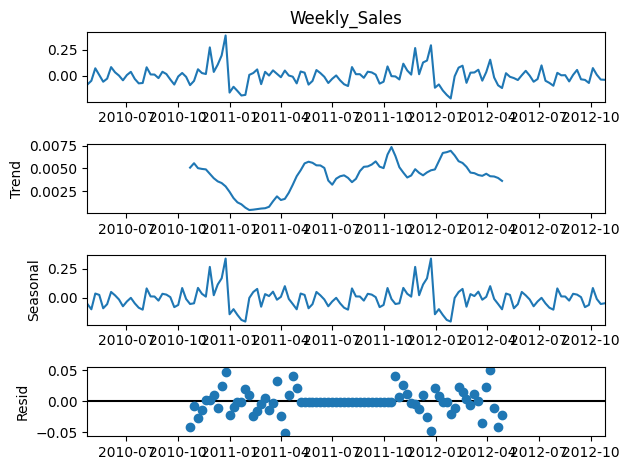

In [118]:
decomposition = seasonal_decompose(store['Weekly_Sales'])
decomposition.plot();

<hr style = "height: 1px">

**ADF TEST**

<hr style = "height: 1px">


Visually it looks like our data has now become stationary. Visual confirmation is ambiguous so we need to perform a test to confirm the data is stationary (ADF or KPSS):

<hr>

In [119]:
#ADF Test - if the p-value < 0.05 - Data is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(store)

print(f'ADF Statistic: {result[0]}') #some default value based upon the critial values
print(f'p-value: {result[1]}')
print(f'n_lags: {result[2]}') #previous no.of observations used for prediction

ADF Statistic: -6.113651018315903
p-value: 9.204565497005554e-08
n_lags: 4


In [120]:
if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("The series is stationary")

The series is stationary


<hr style = "height: 1px">

**MODEL TRANSFORMATION**

<hr style = "height: 1px">

<br>

PD and q values are required for ARIMA. We get these values from **acf (q)** and **pacf (p)** plots. The **d value stands for differencing**. If the data is not stationary we perform log transformations. The number of log or any other transformations we use is the d value.<br>
<br>

**acf (q):** We find the q value based on where the first shut off happens in the acf plot. We select the value before the shut off.<br>
<br>

**pacf (p):** We use the same method to find the p value.
<hr>

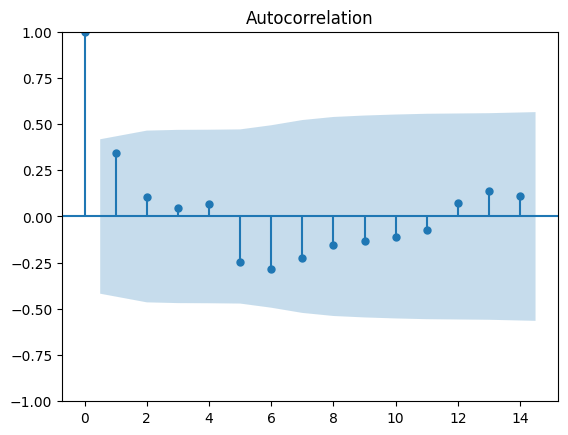

In [121]:
# acf gives us the acf values. Plot_acf allows us to visualise these values
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

acf_plot = acf(store.dropna()) # Gradual decrease and previuous point to that - 1
plot_acf(acf_plot);

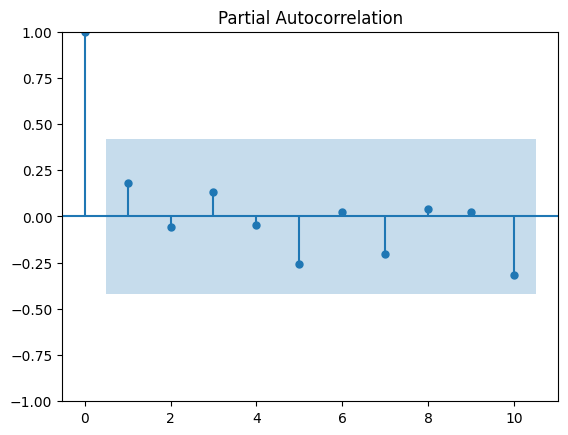

In [122]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

pacf_plot = pacf(store.dropna())
plot_pacf(pacf_plot, lags=10); # lags doesn't need to be set to 10.

<hr>

**Based on the acf and pacf plots, our q value is 4 and our p value is 1.** <br>
<br>
We will now split the data in train and test data subsets:
<hr>

In [123]:
# We will use 100 rows for training and the remaining for testing
trainLen = 110
testLen = len(store) - 110

train=store.iloc[:trainLen]['Weekly_Sales']
test=store.iloc[trainLen:]['Weekly_Sales']

In [124]:
train.head()

Date
2010-04-23   -0.083201
2010-04-30   -0.047274
2010-05-07    0.072908
2010-05-14    0.008380
2010-05-21   -0.056418
Name: Weekly_Sales, dtype: float64

In [125]:
test.head()

Date
2012-06-01    0.005815
2012-06-08    0.048651
2012-06-15    0.002261
2012-06-22   -0.056443
2012-06-29   -0.030777
Name: Weekly_Sales, dtype: float64

<hr>

**Creating the ARIMA model**
<hr>

In [126]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,order=(1,0,4)) #(p,d,q)
model_fit = model.fit()
model_fit

C:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



<hr>
Create a new column called predict and compare these values to the original data
<hr>

<AxesSubplot: xlabel='Date'>

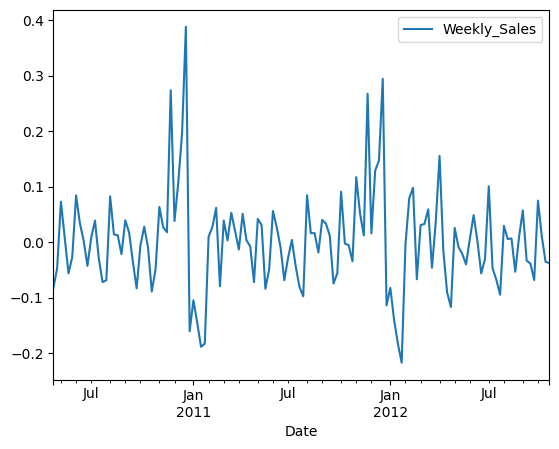

In [127]:
store['predict'] = model_fit.get_prediction(start=len(train),end=len(train)+len(test)-1,dynamic=True)
store[['Weekly_Sales','predict']].plot()

<hr>

**Creating the SARIMAX model**<br>
<br>
ARIMA doesn't work well with seasonal data. We are now saying although there may be a seasonal trend, there may be other external factors that cause the data to change predictions.
<hr>

In [128]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train,order=(1,0,4),seasonal_order=(1,0,4,52), enforce_invertibility=False) # 52 is how many rows of data the pattern is repeated. 52 weeks is 1 year
model=model.fit()

C:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<AxesSubplot: xlabel='Date'>

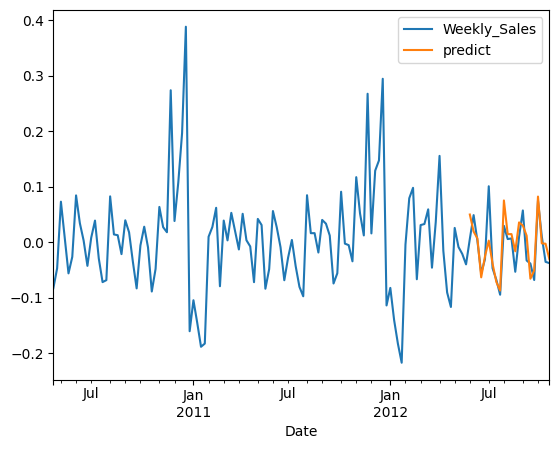

In [129]:
store['predict'] = model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
store[['Weekly_Sales','predict']].plot()

<hr>

**Forecasting sales for the next 12 weeks**<br>
<br>
The predicted data contains the number of weeks from the test data. Therefore we need to provide 12 weeks plus the number of weeks used to test the data. This will provide us with 12 weeks worth of forecast data. This calculation can be seen below:

<hr>

In [130]:
# 12 weeks of weekly sales predicted added to the number of weeks used to test the data
numSteps = 12 + testLen
forecast = model.forecast(steps=numSteps)

<AxesSubplot: xlabel='Date'>

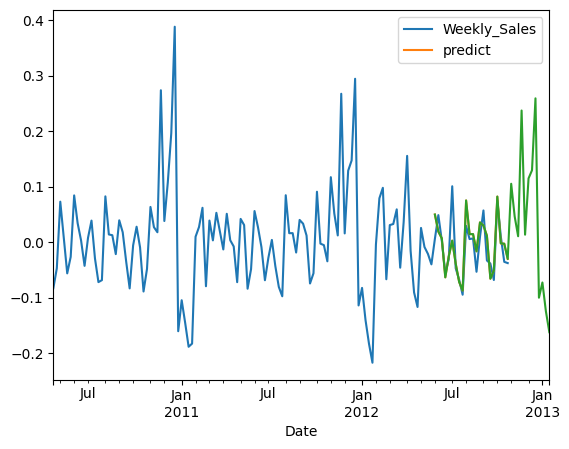

In [131]:
store.plot()
forecast.plot()

# Forecasting sales for the next 12 weeks

<hr style = "height: 1px">

**CONVERT FORECAST DATA TO A DATAFRAME**

<hr style = "height: 1px">

In [132]:
forecast = pd.DataFrame(forecast)
forecast.columns = ['Weekly_Sales']
forecast.index.name = 'Date'

In [133]:
forecast.tail(13)

Weekly_Sales
Date                    
2012-10-26     -0.030449
2012-11-02      0.105239
2012-11-09      0.046341
2012-11-16      0.010532
2012-11-23      0.237415
2012-11-30      0.013361
2012-12-07      0.114872
2012-12-14      0.129617
2012-12-21      0.259373
2012-12-28     -0.100353
2013-01-04     -0.072866
2013-01-11     -0.124676
2013-01-18     -0.162581

<hr style = "height: 1px">

**CONVERT PREDICTED VALUES BACK TO ORIGINAL WEEKLY_SALES DATA**

<hr style = "height: 1px">

**Doesn't work because mean_log values are NaN for predicted data. We can't get original sales numbers**

In [134]:
store = store.drop('predict', axis=1)
store = store+mean_log
store = store.dropna()

In [135]:
store = np.exp(store)
store = store.dropna()
store

Weekly_Sales
Date                    
2010-04-23    1391256.12
2010-04-30    1425100.71
2010-05-07    1603955.12
2010-05-14    1494251.50
2010-05-21    1399662.07
...                  ...
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

[132 rows x 1 columns]

In [136]:
forecast = forecast+mean_log
forecast = forecast.dropna()

In [137]:
forecast = np.exp(forecast)
forecast = forecast.dropna()

In [138]:
forecast.tail(13)

Weekly_Sales
Date                    
2012-08-03  1.707628e+06
2012-08-10  1.606593e+06
2012-08-17  1.610362e+06
2012-08-24  1.550297e+06
2012-08-31  1.623759e+06
2012-09-07  1.617148e+06
2012-09-14  1.586961e+06
2012-09-21  1.465575e+06
2012-09-28  1.462134e+06
2012-10-05  1.683080e+06
2012-10-12  1.553143e+06
2012-10-19  1.558216e+06
2012-10-26  1.504839e+06